In this notebook we simulate the dynamics of three Rydberg atoms to efficiently generate triply ground-to-excited transitions governed by a collective Rabi frequency (transition amplitude) $\overline{\Omega}$

In [3]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'qutip'

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=BIGGER_SIZE)  

In [3]:
# Parameter normalisation to define timescales
punit = 1 

""" # Parameters (frequencies, detunings, and couplings)
Ω1, Ω2, Ω3 = 20*punit,10*punit,7*punit  # Rabi frequencies for atoms
δ1, δ2, δ3 = 1*punit, -1*punit, 1*punit  # Detunings for each atom
Δa, Δb = 20*punit, 20*punit  # Frequency shifts
g_a, g_b = 1*punit,1*punit  # Coupling strengths """

Ω1, Ω2, Ω3 = 56.50*punit, 60.0*punit, 112.0*punit  # Rabi frequencies for atoms
δ1, δ2, δ3= 663.8*punit,-742.0*punit, 716.0*punit # Detunings for each atom
Δa, Δb = 722.0*punit,800.0*punit  # Frequency shifts
g_a, g_b = 9.5*punit,10.0*punit # Coupling strengths

# Photon number (n) for different transitions
n = 10  # Example photon number for simulation


As in the 2 atom case, we can reduce the problem to work only with the collective states spanned by the individual ground/excited states in the basis $$\{|rrr,n+1\rangle, |grr,n\rangle, |rgr,n+2\rangle, |rrg,n\rangle, |rgg,n+1\rangle, |grg,n-1\rangle, |ggr,n+1\rangle, |ggg,n\rangle\}^T$$

In [2]:
# Hamiltonian and detunings for individual atoms 

ΩΩ1 = Ω1*Ω1
def Delta1(n): 
     Delta1 = δ1-Δa+ΩΩ1/δ1-g_a*g_a*(n+1)/δ1+g_b*g_b*(n+2)/Δb
     return Delta1

# ΩΩ2 = Ω2*Ω2
def Delta2(n): 
    Delta2 = δ2
    return Delta2


ΩΩ3 = Ω3*Ω3
def Delta3(n): 
    Delta3 = δ3+Δb+ΩΩ3/δ3-g_b*g_b*n/δ3-g_a*g_a*(n-1)/Δa
    return Delta3


def Omega1t(n):
    Omega1t = Ω1*g_a*np.sqrt(n+1)/δ1
    return Omega1t

def Omega2t(n):
    Omega2t = Ω2
    return Omega2t

def Omega3t(n):
    Omega3t = Ω3*g_b*np.sqrt(n)/δ3
    return Omega3t

def H_atom1(n):
    sqrt_n1 = np.sqrt1(n+1)
    # 2x2 matrix for the atom's Hamiltonian
    H = np.array([[Delta1(n),Omega1t(n)],
                [Omega1t(n),0]])
    
    return Qobj(H)

def H_atom2(n):
    sqrt_n= np.sqrt1(n)
    # 2x2 matrix for the atom's Hamiltonian
    H = np.array([[Delta2(n), Omega2t(n)],
                [Omega2t(n),0]])
    
    return Qobj(H)

def H_atom3(n):
    sqrt_n1 = np.sqrt1(n)
    # 2x2 matrix for the atom's Hamiltonian
    H = np.array([[Delta3(n), Omega3t(n)],
                [Omega3t(n),0]])
    
    return Qobj(H)

NameError: name 'Ω1' is not defined

Moving to the combined basis the Hamiltonian takes the form:

$$ H_T =  
\begin{pmatrix}
        0 & \tilde{\Omega}_1(n) & \Omega_2 & \tilde{\Omega}_3(n) & 0 & 0 & 0 & 0 \\
        \tilde{\Omega}_1(n) & \Delta_1(n) & 0 & 0 &  \Omega_2 &  \tilde{\Omega}_3(n+1) & 0 & 0 \\
        \Omega_2 & 0 & \delta_2 & 0 & \tilde{\Omega}_1(n) & 0 & \tilde{\Omega}_3(n) & 0 \\
        \tilde{\Omega}_3(n) & 0 & 0 & \Delta_3(n) & 0 & \tilde{\Omega}_1(n-1) & \Omega_2 & 0 \\
        0 & \Omega_2 & \tilde{\Omega}_1(n) & 0 & \Delta_{rrg}(n) & 0 & 0 & \tilde{\Omega}_3(n+1) \\
        0 & \tilde{\Omega}_3(n) & 0 & \tilde{\Omega}_1(n) & 0 & \Delta_{rgr}(n) & 0 & \Omega_2 \\
        0 & 0 & \tilde{\Omega}_3(n+1) & \Omega_2 & 0 & 0 & \Delta_{grr}(n) & \tilde{\Omega}_1(n-1) \\
        0 & 0 & 0 & 0 & \tilde{\Omega}_3(n+1) & \Omega_2 & \tilde{\Omega}_1(n-1) & \Delta_R(n) \end{pmatrix}
$$

where $\Delta_R(n) = \Delta_1(n-1) + \delta_2 +\Delta_3(n+1)$.

In [ ]:

dets = np.linspace(10,0,8)

Deltagg = 0
Deltagrr = Delta3(n) + Delta2(n)
Deltargr = Delta3(n+1) + Delta1(n-1) # 
Deltarrg = Delta1(n) + Delta2(n)
Deltargg = Delta1(n) 
Deltagrg = Delta2(n) # 
Deltaggr = Delta3(n) # 
Deltarrr = Delta1(n) + Delta2(n+2) + Delta3(n) 


H_a = np.array([[0,Omega1t(n),Omega2t(n),Omega3t(n), 0,0,0,0],
                [Omega1t(n),Deltargg,0,0, Omega2t(n), Omega3t(n+1), 0, 0],
                [Omega2t(n), 0, Deltagrg, 0, Omega1t(n), 0, Omega3t(n), 0],
                [Omega3t(n), 0, 0, Deltaggr, 0, Omega1t(n-1), Omega2t(n), 0], 
                [0, Omega2t(n), Omega1t(n), 0, Deltarrg, 0, 0, Omega3t(n+1)],
                [0, Omega3t(n), 0, Omega1t(n), 0, Deltargr, 0, Omega2t(n)],
                [0, 0, Omega3t(n+1), Omega2t(n), 0, 0, Deltagrr, Omega1t(n-1)],
                [0,0,0,0, Omega3t(n+1), Omega2t(n), Omega1t(n-1), Deltarrr]]
)
Ht= Qobj(H_a)
Ht

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 1.16370274e+01  2.68182940e+00 -2.80116034e+00  4.92861561e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.68182940e+00  5.18543078e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  4.69925060e+00 -2.68190684e+00  0.00000000e+00]
 [-2.55709784e+00  0.00000000e+00 -4.17414641e+01  0.00000000e+00
   5.14777112e+00  0.00000000e+00  2.80107945e+00  0.00000000e+00]
 [ 4.92861561e+00  0.00000000e+00  0.00000000e+00  5.18543078e-03
  -2.68190684e+00  2.55702400e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  5.14777112e+00 -2.68190684e+00
  -5.33865020e+01  0.00000000e+00  0.00000000e+00  2.68182940e+00]
 [ 0.00000000e+00  4.69925060e+00  0.00000000e+00  2.55702400e+00
   0.00000000e+00  5.33709569e+01  0.00000000e+00 -2.55709784e+00]
 [ 0.00000000e+00 -2.68190684e+00  2.80107945e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.16330307

In [8]:
rrr_state = basis(8,0)
grr_state = basis(8,1)
rgr_state = basis(8,2)
rrg_state = basis(8,3)
rgg_state = basis(8,4)
grg_state = basis(8,5)
ggr_state = basis(8,6)
ggg_state = basis(8,7)

P = rrr_state*rrr_state.dag() + ggg_state*ggg_state.dag()
Q = qeye(8) - P

In [9]:
H_eff = P*Ht*P - P*Ht*Q*(Q*Ht*Q+10e-10*qeye(8)).inv()*Q*Ht*P 

In [10]:
H_eff

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[-249.28631882    0.            0.            0.            0.
     0.            0.           22.65758687]
 [   0.            0.            0.            0.            0.
     0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.        ]
 [  22.64683625    0.            0.            0.            0.
     0.            0.           -1.63164257]]

In [24]:
initial_state = ggg_state

# Time evolution
times = np.linspace(0, 240*punit, 1000)  # Time range for simulation

# Solve the master equation
opts = Options(nsteps=1e8)
result = mesolve(Ht, initial_state, times, c_ops=[], e_ops=[], options=opts)

In [25]:
# Extract expectation values
P_ggg = expect(ggg_state * ggg_state.dag(), result.states)   # Probability of being in the ground state |gg>
P_rrr = expect(rrr_state *rrr_state.dag(), result.states) # Probability of being in the Rydberg state |rr>

P_rr = expect(grr_state*grr_state.dag() + rgr_state*rgr_state.dag() * rrg_state*rrg_state.dag(), result.states)
P_r = expect(ggr_state*ggr_state.dag() + grg_state*grg_state.dag() * rgg_state*rgg_state.dag(), result.states)

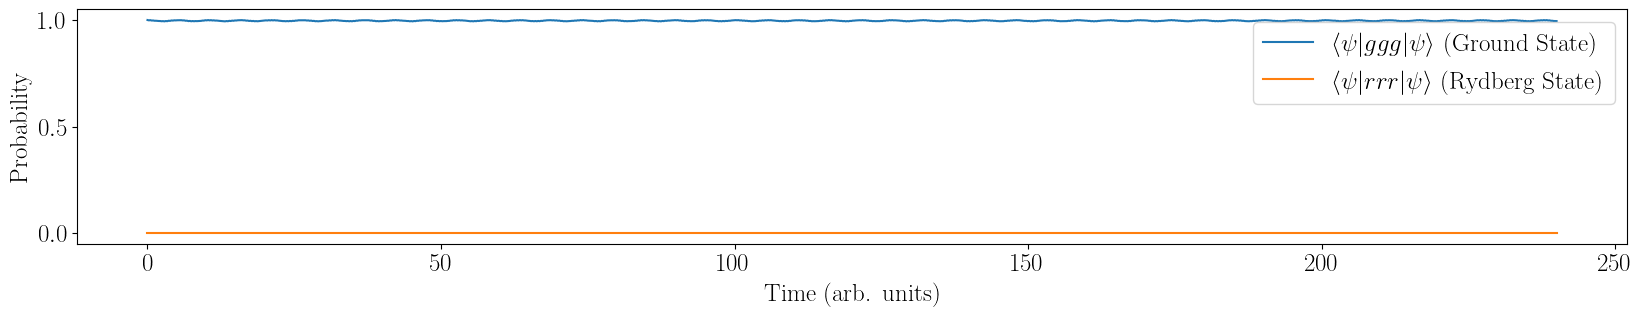

In [27]:
# Plot the probabilities and coherences
plt.figure(figsize=(20, 14))

# Plot probabilities
plt.subplot(411)
plt.plot(times, P_ggg, label=r'$\langle \psi | ggg | \psi \rangle$ (Ground State)')
plt.plot(times, P_rrr, label=r'$\langle \psi | rrr | \psi \rangle$ (Rydberg State)')
# plt.plot(times, P_rr, label=r'$\langle \psi | P_{rr} | \psi \rangle$ (Doubly excited)' )
# plt.plot(times, P_r, label=r'$\langle \psi | P_r | \psi \rangle$ (Singly excited)' )
plt.xlabel('Time (arb. units)')
plt.ylabel('Probability')
plt.legend()

(<Figure size 640x480 with 2 Axes>, <Axes: >)

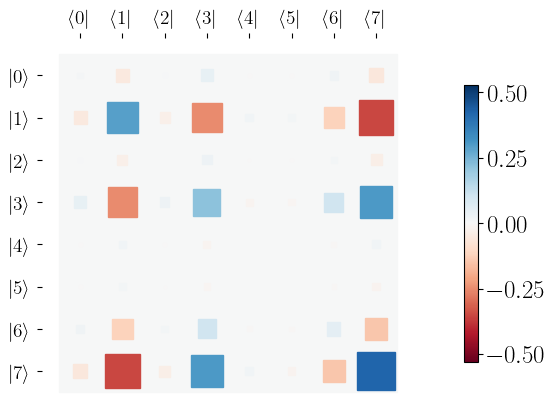

In [115]:
rho_f = result.states[-1]*result.states[-1].dag()
hinton(rho_f)